<a href="https://colab.research.google.com/github/anujott-codes/insurance-cost-estimator/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

##Data Loading

In [308]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YT/EDA/Insurance Project/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Data understanding

In [309]:
#number of rows and columns
df.shape

(1338, 7)

In [310]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [311]:
#statistical info
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [312]:
#checking for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [313]:
#numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age', 'bmi', 'children', 'charges']

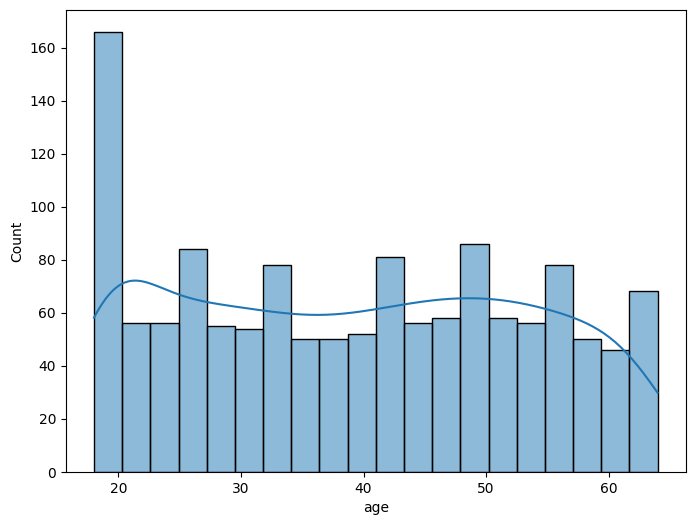

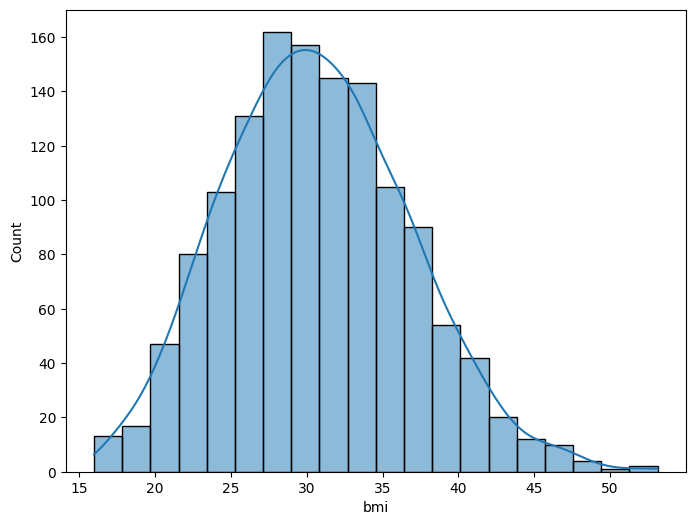

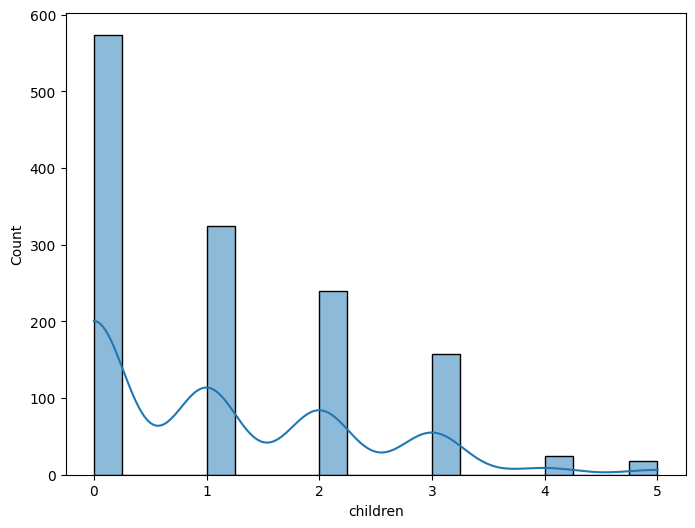

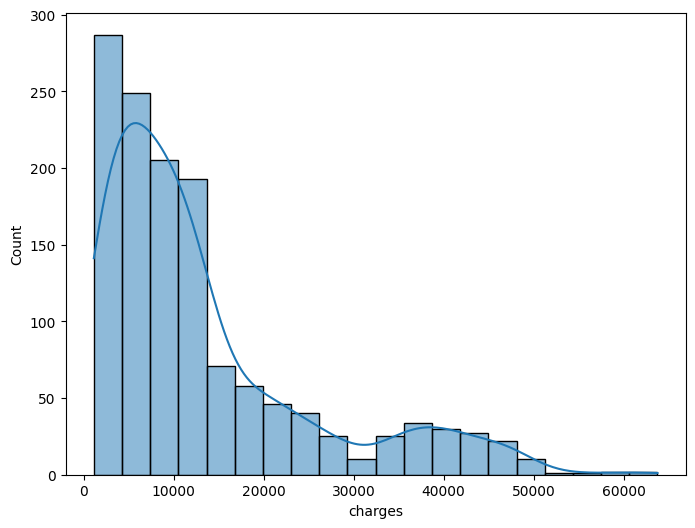

In [314]:
#checking distribution for numeric columns
for col in numeric_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(data=df,x=col,kde=True,bins=20)
  plt.show()

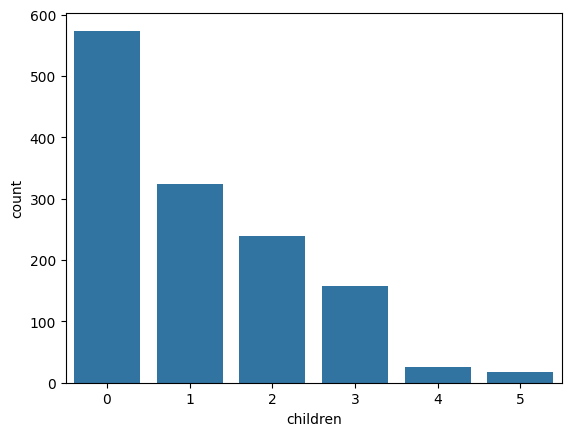

In [315]:
#checking distribution for children using countplot
sns.countplot(data=df,x='children')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

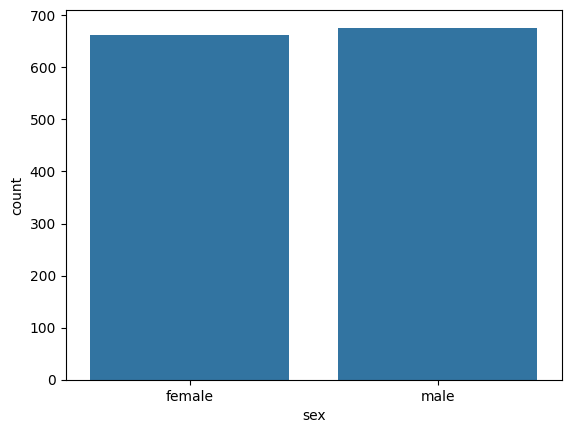

In [316]:
#checking number of females and males
sns.countplot(data=df,x='sex')

<Axes: xlabel='smoker', ylabel='count'>

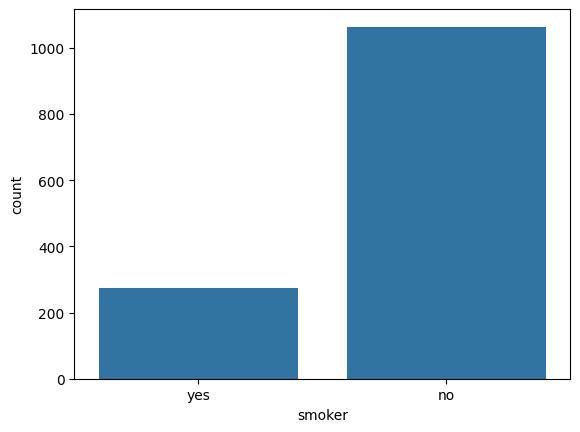

In [317]:
#checking the number of smokers
sns.countplot(data=df,x='smoker')

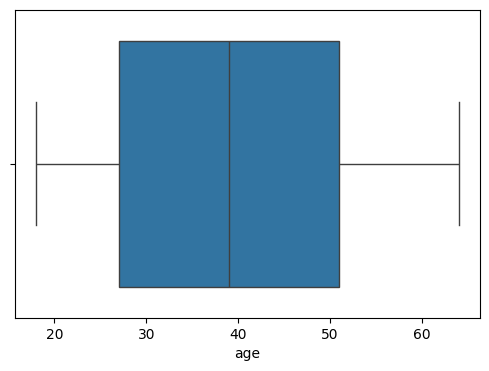

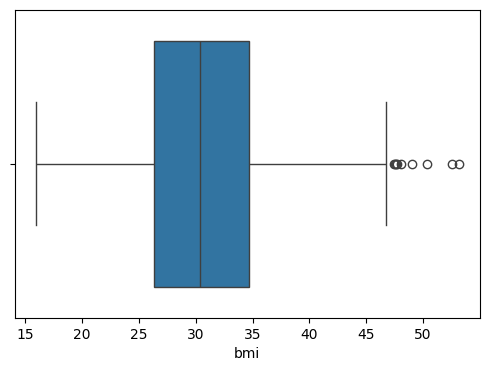

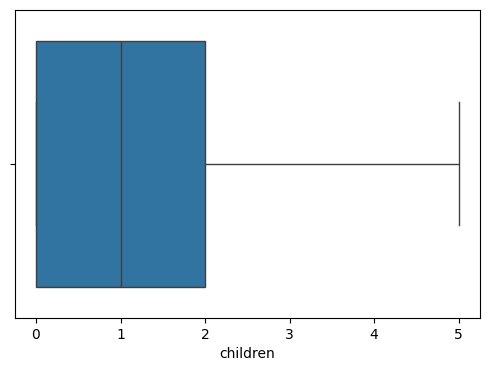

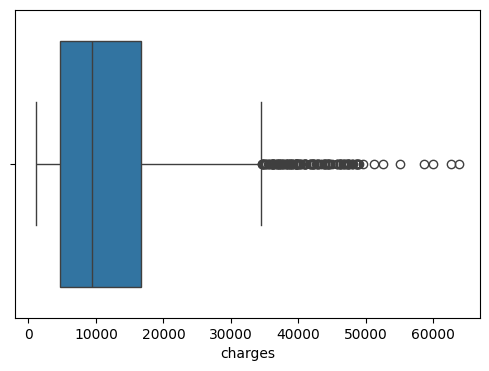

In [318]:
#checking for outliers
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df,x=col)
  plt.show()

<Axes: >

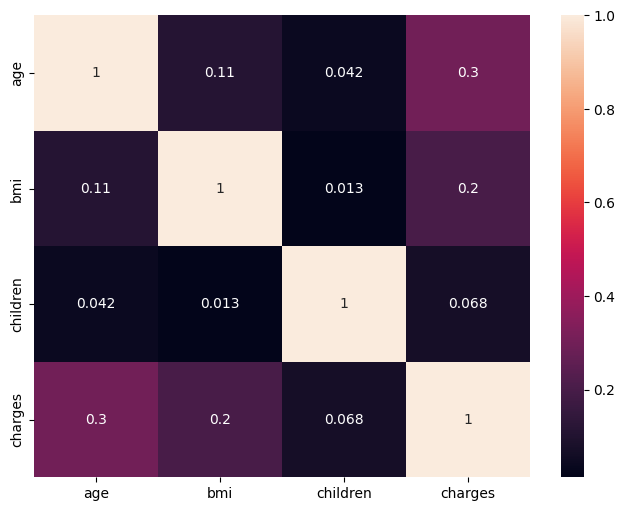

In [319]:
#correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [320]:
# Data Cleaning and Preprocessing
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [321]:
df_cleaned.shape

(1338, 7)

In [322]:
#cleaning duplicates
df_cleaned.drop_duplicates(inplace=True)

In [323]:
df_cleaned.shape

(1337, 7)

In [324]:
#checking for null values
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [325]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [326]:
#checking for inconsistencies
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [327]:
#encoding sex column
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [328]:
#checking for inconsistency in smoker column
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [329]:
#encoding smoker column
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no':0,'yes':1})
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [330]:
#renaming sex and smoker
df_cleaned.rename(columns={'sex':'is_female','smoker':'is_smoker'},inplace=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [331]:
#checking regions column for inconsistency
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [332]:
#encoding region column
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [333]:
df_cleaned[['region_northwest',	'region_southeast',	'region_southwest']] =  df_cleaned[['region_northwest',	'region_southeast',	'region_southwest']].astype('int')
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


<Axes: xlabel='bmi', ylabel='Count'>

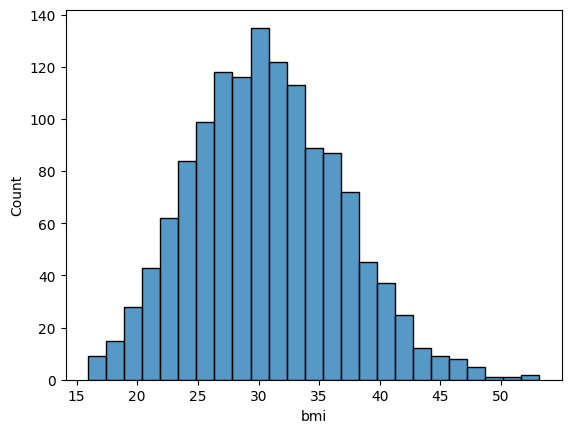

In [334]:
#feature engineering and extraction
sns.histplot(data=df_cleaned,x='bmi')

In [335]:
#creating bmi_category based on bmi
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['underweight', 'normal', 'overweight', 'obese']
)
df_cleaned


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,obese
2,28,0,33.000,3,0,4449.46200,0,1,0,obese
3,33,0,22.705,0,0,21984.47061,1,0,0,normal
4,32,0,28.880,0,0,3866.85520,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,obese
1334,18,1,31.920,0,0,2205.98080,0,0,0,obese
1335,18,1,36.850,0,0,1629.83350,0,1,0,obese
1336,21,1,25.800,0,0,2007.94500,0,0,1,overweight


In [336]:
#encoding bmi category
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,0,0,1,False,True,False
1,18,0,33.770,1,0,1725.55230,0,1,0,False,False,True
2,28,0,33.000,3,0,4449.46200,0,1,0,False,False,True
3,33,0,22.705,0,0,21984.47061,1,0,0,True,False,False
4,32,0,28.880,0,0,3866.85520,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,False,False,True
1334,18,1,31.920,0,0,2205.98080,0,0,0,False,False,True
1335,18,1,36.850,0,0,1629.83350,0,1,0,False,False,True
1336,21,1,25.800,0,0,2007.94500,0,0,1,False,True,False


In [337]:
df_cleaned[['bmi_category_normal','bmi_category_overweight','bmi_category_obese']] = df_cleaned[['bmi_category_normal','bmi_category_overweight','bmi_category_obese']].astype('int')
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0,0,0,1
1334,18,1,31.920,0,0,2205.98080,0,0,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,1,0,0,0,1
1336,21,1,25.800,0,0,2007.94500,0,0,1,0,1,0


In [338]:
#checking feature-target correlation/
correlation_df = df_cleaned.corr()['charges'].sort_values(ascending=False).drop('charges')
correlation_df

,charges
is_smoker,0.787234
age,0.298308
bmi,0.198401
bmi_category_obese,0.197659
region_southeast,0.073578
children,0.067389
region_northwest,-0.038695
region_southwest,-0.043637
is_female,-0.058044
bmi_category_normal,-0.105655


In [339]:
#chi-square test for categorical features
categorical_features = ['is_female','is_smoker','region_northwest',	'region_southeast',
                        'region_southwest',	'bmi_category_normal',
                        'bmi_category_overweight',	'bmi_category_obese']

In [340]:
from scipy.stats import chi2_contingency

df_cleaned['charges_category'] = pd.qcut(df_cleaned['charges'],q=4,labels=False)

alpha = 0.05

significant_features = []
insignificant_features = []

print("🔎 Chi-Square Test Results:")
print("=" * 50)

for col in categorical_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_category'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {col}")
    print(f"p-value: {p:.4f}")

    if p < alpha:
        print("Statistically significant → Keep this feature")
        significant_features.append(col)
    else:
        print("\nNot statistically significant → Drop this feature")
        insignificant_features.append(col)

    print("-" * 50)

# Print final summaries
print("\nFeatures to Keep:")
print(significant_features)
print("\nFeatures to Drop:")
print(insignificant_features)

# as p-value for obese category is very close to alpha we first try with keeping the obese category as it could have a effect
insignificant_features.remove('bmi_category_obese')

#Drop from DataFrame
df_cleaned.drop(columns=insignificant_features, inplace=True)

🔎 Chi-Square Test Results:
Feature: is_female
p-value: 0.0165
Statistically significant → Keep this feature
--------------------------------------------------
Feature: is_smoker
p-value: 0.0000
Statistically significant → Keep this feature
--------------------------------------------------
Feature: region_northwest
p-value: 0.7688

Not statistically significant → Drop this feature
--------------------------------------------------
Feature: region_southeast
p-value: 0.0011
Statistically significant → Keep this feature
--------------------------------------------------
Feature: region_southwest
p-value: 0.1652

Not statistically significant → Drop this feature
--------------------------------------------------
Feature: bmi_category_normal
p-value: 0.2344

Not statistically significant → Drop this feature
--------------------------------------------------
Feature: bmi_category_overweight
p-value: 0.2405

Not statistically significant → Drop this feature
-----------------------------------

In [341]:
#final df_cleaned
df_cleaned = df_cleaned.drop(columns = ['charges_category'])
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,0,0
1,18,0,33.770,1,0,1725.55230,1,1
2,28,0,33.000,3,0,4449.46200,1,1
3,33,0,22.705,0,0,21984.47061,0,0
4,32,0,28.880,0,0,3866.85520,0,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1
1334,18,1,31.920,0,0,2205.98080,0,1
1335,18,1,36.850,0,0,1629.83350,1,1
1336,21,1,25.800,0,0,2007.94500,0,0
